In [10]:
import pandas as pd
import distances
from Bio.PDB import *

In [2]:
# Dataset with all the PDB structures for all kinases (123 out of 280)
uniprot_pdb = pd.read_csv('../datasets/uniprot_pdb.tsv', sep= '\t')
# cre = pd.read_csv('../datasets/cre_dataset.csv')

In [4]:
uniprot_pdb.uniprot_acc.nunique()

123

In [6]:
uniprot_pdb.pdb.nunique()

2470

In [3]:
#cre[['id_cre', 'uniprot_acc', 'start_aa', 'end_aa']]

In [5]:
kinases = pd.read_csv('../datasets/kinases.tsv', sep= '\t')

In [5]:
# Table with pdb ids of kinases containing CREs dataset
pdbs_kd_cre = pd.read_csv('../datasets/pdbs_kd_cre.tsv', sep= '\t')
pdbs_kd_cre

,uniprot_acc,id_pdb,id_cre,id_kd,pdb
0,A5K0N4,5147,10,10,5fet
1,O74536,8034,21,21,3h4j
2,O74536,8035,21,21,3h4j
3,O75582,579,22,23,3kn5
4,O75582,582,22,23,3kn5
...,...,...,...,...,...
1532,Q16644,2845,142,147,3fhr
1533,Q16644,5339,142,147,7nrb
1534,Q61846,1754,178,183,4bfm
1535,Q61846,7063,178,183,4cqg


In [6]:
pdbs_kd_cre.uniprot_acc.nunique() # 42 proteins with structure that includes KD and CRE

42

---

### Download PDBs files

In [11]:
parser = PDBParser()

In [12]:
pdbs = uniprot_pdb.pdb.unique().tolist()

In [13]:
# download structures
pdbl = PDBList()
for pdb in pdbs:
    pdbl.retrieve_pdb_file(pdb, file_format= 'pdb', pdir= '../raw_data/pdb_files')

In [7]:
cter = pd.read_csv('../raw_data/uniprot_kd_cre_cter.gz', sep= '\t', compression= 'gzip')
cter.columns = cter.columns.str.lower().str.replace(" ", "_")
cter.drop(columns= ['from', 'entry_name'], inplace= True)

In [8]:
pdbs_kd_cre[pdbs_kd_cre.uniprot_acc.isin(cter.entry)].uniprot_acc.nunique()

22

- chain_a and chain_b should be the same

In [9]:
from distances import carbon_alfa_selector


dist_all_6yp3 = distances.calculate_distances(pdb_source= '../raw_data/6yp3.pdb', atom_selector= carbon_alfa_selector, include_extra_info= True)

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2378.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 2700.
  PDBConstructionWarning,


In [10]:
dist_cb_6yp3 = distances.calculate_distances(pdb_source= '../raw_data/6yp3.pdb')

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2378.
  PDBConstructionWarning,
c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\Bio\PDB\StructureBuilder.py:92: PDBConstructionWarning: WARNING: Chain P is discontinuous at line 2700.
  PDBConstructionWarning,


In [11]:
distances.save_distances(dist_all_6yp3, outfile= "../datasets/distances_6yp3")

In [12]:
# Mapping SIFT positions in PDB and positions in UniProt
mapping = pd.read_csv('../raw_data/uniprot_segments_observed.tsv.gz', sep= '\t', compression= 'gzip', skiprows= 1)
mapping.columns = mapping.columns.str.lower().str.replace(" ", "_")
mapping = mapping[['pdb', 'chain', 'sp_primary', 'pdb_beg', 'pdb_end', 'sp_beg', 'sp_end']]
mapping

,pdb,chain,sp_primary,pdb_beg,pdb_end,sp_beg,sp_end
0,1wfc,A,Q16539,5,13,5,13
1,1wfc,A,Q16539,16,169,16,169
2,1wfc,A,Q16539,175,351,175,351
3,6aek,A,P06802,170,620,170,620
4,6aek,A,P06802,629,629,629,629
...,...,...,...,...,...,...,...
960081,7liw,B,P53396,2,139,2,139
960082,7liw,B,P53396,149,431,149,431
960083,7liw,B,P53396,487,1099,487,1099
960084,7liw,C,P53396,821,1099,821,1099


In [13]:
mapping[mapping.pdb == '6yp3']

,pdb,chain,sp_primary,pdb_beg,pdb_end,sp_beg,sp_end
12448,6yp3,A,P31947,1,231,1,231
12449,6yp3,P,Q04206,43,51,43,51


In [14]:
df = pd.DataFrame(dist_all_6yp3, columns = ['chain_a', 'pos_a', 'aa_a', 'atom_a', 'chain_b', 'pos_b', 'aa_b', 'atom_b', 'dist'])
df

,chain_a,pos_a,aa_a,atom_a,chain_b,pos_b,aa_b,atom_b,dist
0,A,-4,GLY,CA,A,-3,ALA,CA,3.796278
1,A,-4,GLY,CA,A,-2,MET,CA,5.349024
2,A,-4,GLY,CA,A,-1,GLY,CA,5.457746
3,A,-4,GLY,CA,A,0,SER,CA,8.641986
4,A,-4,GLY,CA,A,1,MET,CA,10.302398
...,...,...,...,...,...,...,...,...,...
29885,P,48,GLY,CA,P,50,ARG,CA,5.733504
29886,P,48,GLY,CA,P,51,SER,CA,7.195534
29887,P,49,ARG,CA,P,50,ARG,CA,3.829051
29888,P,49,ARG,CA,P,51,SER,CA,6.734550


In [18]:
df = df[(df.pos_a > 0) & (df.pos_b > 0)]
df

,chain_a,pos_a,aa_a,atom_a,chain_b,pos_b,aa_b,atom_b,dist
1165,A,1,MET,CA,A,2,GLU,CA,3.811132
1166,A,1,MET,CA,A,3,ARG,CA,6.488035
1167,A,1,MET,CA,A,4,ALA,CA,8.469985
1168,A,1,MET,CA,A,5,SER,CA,6.629316
1169,A,1,MET,CA,A,6,LEU,CA,6.614064
...,...,...,...,...,...,...,...,...,...
29885,P,48,GLY,CA,P,50,ARG,CA,5.733504
29886,P,48,GLY,CA,P,51,SER,CA,7.195534
29887,P,49,ARG,CA,P,50,ARG,CA,3.829051
29888,P,49,ARG,CA,P,51,SER,CA,6.734550


<AxesSubplot:>

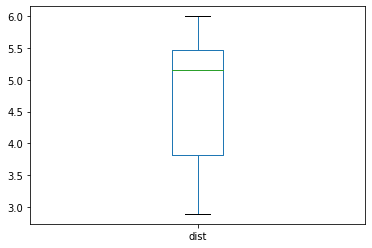

In [22]:
df[df.dist <= 6].dist.plot(kind= 'box')

pasos:  
- medir distancias entre los aa del KD con los del CRE  
- marcar los aa cataliticos

In [25]:
from itertools import product

In [31]:
list(product([1, 2], [3,4]))

[(1, 3), (1, 4), (2, 3), (2, 4)]

In [33]:
from distances import Distances

In [43]:
# for l in dist_cb_6yp3:
#     for elem in l:
#         print(elem)
#     # for chain_a, pos_a, chain_b, pos_b, dist in l:
#     #     print(chain_a, pos_a, chain_b, pos_b, dist)

In [35]:
Distances.is_contact(dist_cb_6yp3)

TypeError: is_contact() missing 4 required positional arguments: 'chain_a', 'pos_a', 'chain_b', and 'pos_b'

In [17]:
distances.save_distances(dist_6yp3, '../datasets/dist_6yp3')